**TBATS**: periodo di 5 anni, osservazioni giornaliere, due stagionalità: settimanale e annuale

**T**rigonometric seasonality, **B**ox-Cox transformation, **A**RMA errors, **T**rend and **S**easonal components.

![tbats](https://miro.medium.com/max/1050/1*yfruZnSYsNt1X1uyag46eQ.png)

Each seasonality is modeled by a trigonometric representation based on Fourier series. One major advantage of this approach is that it requires only 2 seed states regardless of the length of period. Another advantage is the ability to model seasonal effects of non-integer lengths. For example, given a series of daily observations, one can model leap years with a season of length 365.25.

**BATS** differs from TBATS only in the way it models seasonal effects. In BATS we have a more traditional approach where each seasonality is modeled by:

![bats](https://miro.medium.com/max/1050/1*D8KY2jQRmVRLHY5f4RNqKA.png)

This implies that BATS can only model integer period lengths. Approach taken in BATS requires m_i seed states for season i, if this season is long the model may become intractable.

How Does TBATS Choose The Final Model

Under the hood TBATS will consider various alternatives and fit quite a few models. It will consider models:
- with Box-Cox transformation and without it.
- with and without Trend
- with and without Trend Damping
- with and without ARMA(p,q) process used to model residuals
- non-seasonal model
- various amounts of harmonics used to model seasonal effects

The final model will be chosen using Akaike information criterion (AIC).

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tbats import BATS, TBATS

In [3]:
df = pd.read_csv('./data/serie-storiche-ecommerce-pulito-no-buchi-temporali.csv')
df.head()

,Unnamed: 0,data,new_index,totale,settore,Anno,Mese,Giorno,Mese (n°)
0,0,2014-01-01,NaN,0.0,Pesca,2014,Gennaio,1,1
1,1,2014-01-02,NaN,0.0,Pesca,2014,Gennaio,2,1
2,2,2014-01-03,NaN,0.0,Pesca,2014,Gennaio,3,1
3,3,2014-01-04,NaN,0.0,Pesca,2014,Gennaio,4,1
4,4,2014-01-05,NaN,0.0,Pesca,2014,Gennaio,5,1


In [4]:
df = df[(df['settore'] == 'Pesca')] # df solo pesca
df['data'] = pd.to_datetime(df['data'])

In [5]:
df.dtypes

Unnamed: 0             int64
data          datetime64[ns]
new_index            float64
totale               float64
settore               object
Anno                   int64
Mese                  object
Giorno                 int64
Mese (n°)              int64
dtype: object

In [6]:
df.head()

,Unnamed: 0,data,new_index,totale,settore,Anno,Mese,Giorno,Mese (n°)
0,0,2014-01-01,NaN,0.0,Pesca,2014,Gennaio,1,1
1,1,2014-01-02,NaN,0.0,Pesca,2014,Gennaio,2,1
2,2,2014-01-03,NaN,0.0,Pesca,2014,Gennaio,3,1
3,3,2014-01-04,NaN,0.0,Pesca,2014,Gennaio,4,1
4,4,2014-01-05,NaN,0.0,Pesca,2014,Gennaio,5,1


In [7]:
mask = (df['data'] > '2016-12-31') & (df['data'] <= '2022-01-01')

In [8]:
df = df.loc[mask]

In [9]:
df.head()

,Unnamed: 0,data,new_index,totale,settore,Anno,Mese,Giorno,Mese (n°)
1096,1096,2017-01-01,9165.0,9680.85,Pesca,2017,Gennaio,1,1
1097,1097,2017-01-02,9174.0,29707.62,Pesca,2017,Gennaio,2,1
1098,1098,2017-01-03,9185.0,32710.34,Pesca,2017,Gennaio,3,1
1099,1099,2017-01-04,9195.0,26705.18,Pesca,2017,Gennaio,4,1
1100,1100,2017-01-05,9204.0,28648.77,Pesca,2017,Gennaio,5,1


In [10]:
df = df.set_index('data')
df.head()

,Unnamed: 0,new_index,totale,settore,Anno,Mese,Giorno,Mese (n°)
data,,,,,,,,
2017-01-01,1096,9165.0,9680.85,Pesca,2017,Gennaio,1,1
2017-01-02,1097,9174.0,29707.62,Pesca,2017,Gennaio,2,1
2017-01-03,1098,9185.0,32710.34,Pesca,2017,Gennaio,3,1
2017-01-04,1099,9195.0,26705.18,Pesca,2017,Gennaio,4,1
2017-01-05,1100,9204.0,28648.77,Pesca,2017,Gennaio,5,1


In [11]:
df = df[['settore', 'totale']]
df.head()

,settore,totale
data,,
2017-01-01,Pesca,9680.85
2017-01-02,Pesca,29707.62
2017-01-03,Pesca,32710.34
2017-01-04,Pesca,26705.18
2017-01-05,Pesca,28648.77


In [12]:
y = df['totale']

In [13]:
y_to_train = y.iloc[:(len(y)-365)]
y_to_test = y.iloc[(len(y)-365):] # last year for testing

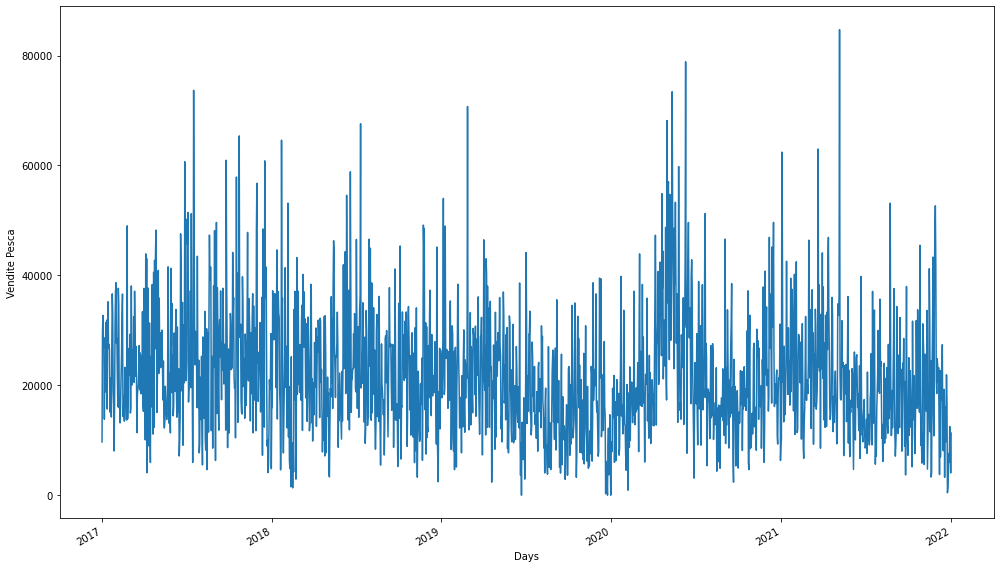

In [14]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(df['totale'])
ax.set_xlabel('Days')
ax.set_ylabel('Vendite Pesca')

fig.autofmt_xdate()

plt.tight_layout()
plt.show()

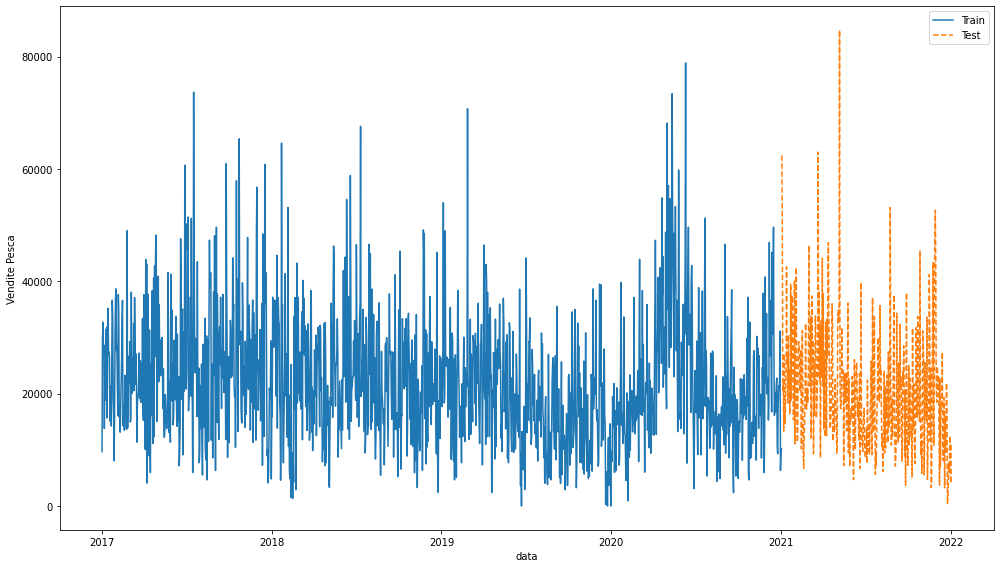

In [15]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(y_to_train, ls='-', label='Train')
ax.plot(y_to_test, ls='--', label='Test')
ax.set_xlabel('data')
ax.set_ylabel('Vendite Pesca')

ax.legend(loc='best')
plt.tight_layout()
plt.show()

Da questa figura dovremmo individuare pattern di stagionalità. (Ad esempio settimanale, mensile, annuale, ecc.)

Before we implement our more complex BATS and TBATS models, it’s always a good idea to have a baseline model. That way, we can determine if our more complex forecasting methods are actually performant.

In [16]:
y_pred_baseline = y_to_train[-365:].values

Nell'esempio sotto inseriamo stagionalità settimanale (7?)

In [17]:
# Fit the model
estimator = TBATS(seasonal_periods=(7, 365.25))
model = estimator.fit(y_to_train)

# Forecast 365 days ahead
y_forecast = model.forecast(steps=365)

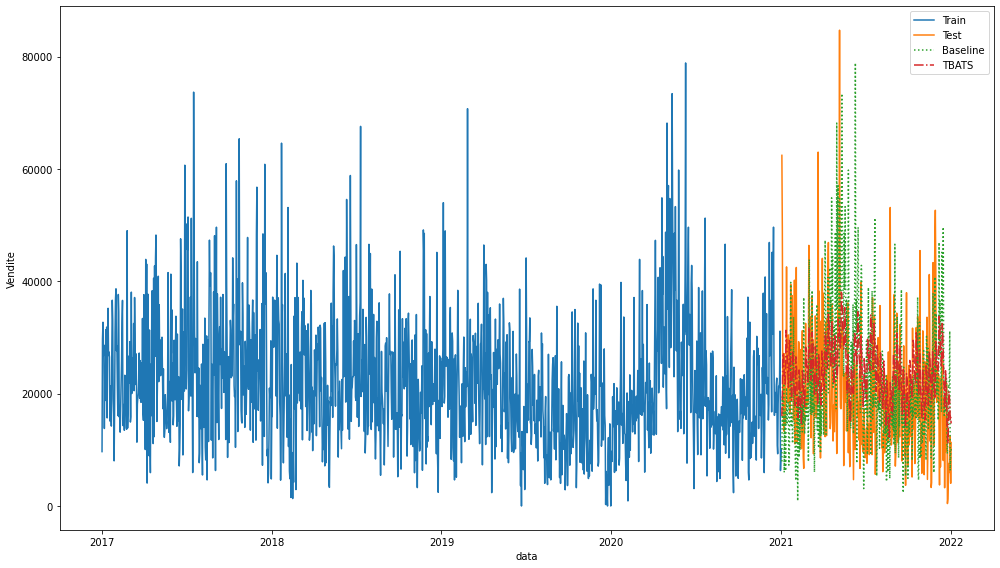

In [18]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(y_to_train, ls='-', label='Train')
ax.plot(y_to_test, ls='-', label='Test')
ax.plot(y_to_test.index, y_pred_baseline, ls=':', label='Baseline')
ax.plot(y_to_test.index, y_forecast, ls='-.', label='TBATS')

ax.set_xlabel('data')
ax.set_ylabel('Vendite')

ax.legend(loc='best')
plt.tight_layout()
plt.show()

MAPE

In [19]:
print('Did the model fit?', model.is_fitted)  # Model may fail to fit in edge-case situations
print('AIC', model.aic)  # may be np.inf

Did the model fit? True
AIC 37578.58733415979


In [20]:
# Short model summary
print('\n\nSUMMARY FUNCTION\n\n')
print(model.summary())



SUMMARY FUNCTION


Use Box-Cox: False
Use trend: False
Use damped trend: False
Seasonal periods: [  7.   365.25]
Seasonal harmonics [ 3 15]
ARMA errors (p, q): (0, 1)
Smoothing (Alpha): 0.061934
Seasonal Parameters (Gamma): [ 0.00047226  0.00115008 -0.00163404 -0.00026627]
AR coefficients []
MA coefficients [-0.00163404]
Seed vector [23811.62089016  -294.49939362  -755.64052973  -464.56553491
  4171.78270444  1117.85275899   702.76021419 -1262.66215592
   117.57311134    59.46007621   552.77845024  -719.71495456
   540.99896736 -1188.52509881 -1490.07482884   -46.49100415
  -602.94402955   283.42476113   -99.68977375  -323.03713954
   115.9480967   -106.56875219  1972.61470129 -1736.58087777
  -129.6264549     86.70673465  -714.39879191   499.39664958
   548.22373894  1440.50748854   969.54945402   -40.20777213
  -470.84848296  1451.53841234   338.72716109   927.58187255
   470.34438797     0.        ]

AIC 37578.587334


In [21]:
print('\n\nIN SAMPLE PREDICTIONS\n\n')
print('Original time series (5 first values)', model.y[:5])
print('Predictions (5 first values)', model.y_hat[:5])
print('Residuals (5 first values)', model.resid[:5])



IN SAMPLE PREDICTIONS


Original time series (5 first values) [ 9680.85 29707.62 32710.34 26705.18 28648.77]
Predictions (5 first values) [18127.39115759 25418.22457753 25049.06433287 24439.18809331
 22261.62731092]
Residuals (5 first values) [-8446.54115759  4289.39542247  7661.27566713  2265.99190669
  6387.14268908]


In [22]:
steps = 365 # one year in this case
y_forecasted = model.forecast(steps=steps)

In [23]:
print('\n\nFORECAST\n\n')
print('Values', y_forecasted)
print('MAE', np.mean(np.abs(y_forecasted - y_to_test)))



FORECAST


Values [16010.72434314 19750.78032029 27234.70336265 27184.12533376
 26247.59655224 23171.54926318 23365.4140184  21702.50958104
 24682.75890903 31277.04782051 30265.99890765 28346.13442706
 24309.56178929 23606.78657523 21145.64810787 23452.53037219
 29515.73681437 28123.84155652 25971.99705924 21842.30479948
 21167.79575143 18832.93055387 21336.66561703 27637.85255527
 26495.65526888 24577.83725201 20642.90663368 20105.56206703
 17838.26700115 20334.94210436 26556.5154953  25271.01722505
 23161.10181843 19005.04422937 18240.73271982 15765.58376881
 18098.47720996 24223.56367656 22928.7402287  20911.7777432
 16960.22958038 16514.70870339 14468.49799723 17329.60561738
 24065.10472217 23440.51566952 22127.15420239 18883.49694813
 19120.06025464 17700.6588637  21106.05710316 28279.75802642
 27968.60555187 26831.05587731 23619.12182178 23743.46051693
 22074.46848574 25105.41705912 31797.41473803 30918.93054751
 29152.80731875 25276.84996276 24727.5439607  22399.85085266
 2480

In [24]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_forecasted), np.array(y_to_test)
    return np.mean(np.abs((y_forecasted - y_to_test) / y_forecasted)) * 100

In [26]:
print('MAPE', mean_absolute_percentage_error(y_forecasted, y_to_test))

MAPE 37.58806059207186
